In [1]:
from logger import Logger
from plot_utils import create_water_tanks_iplot, create_correlation_heatmap
from plot_utils import create_pump_station_plot, create_water_tanks_plot, visualize_attack
from moving_average import MovingAverage

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


import pandas as pd
import seaborn as sns
import os

%matplotlib inline

In [2]:
logger = Logger(show = True, html_output = True, config_file = "config.txt")

2019.06.04-22:11:50 Initialize the logger
2019.06.04-22:11:50 Create logs folder logs
2019.06.04-22:11:50 Create log file logs/2019-06-04_22_11_50_log0.html
2019.06.04-22:11:50 Create models folder models
2019.06.04-22:11:50 Create output folder output
2019.06.04-22:11:50 Create data folder data
2019.06.04-22:11:50 Read config file config.txt


In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%y %H')
train_filename = logger.config_dict['TRAIN_FILE']
logger.log("Start reading training file {}...".format(train_filename))
df_train = pd.read_csv(logger.get_data_file(train_filename), skipinitialspace = True, 
                       parse_dates = ['DATETIME'], date_parser = dateparse, index_col = 'DATETIME')
df_train.sort_index(inplace = True)
logger.log("Finish reading training file", show_time = True)

logger.log("Aggregate training data by mean per day")
df_train_days = df_train.groupby(pd.Grouper(freq='D')).mean()
create_water_tanks_iplot(df_train_days, logger)

[2019.06.04-22:11:50] Start reading training file BATADAL_dataset03.csv...
[2019.06.04-22:11:50] Finish reading training file [0.18s]
[2019.06.04-22:11:50] Aggregate training data by mean per day


In [4]:
logger.log("Number of NaNs values per column {}".format(df_train.isna().sum().to_dict()))
print(os.linesep + "Train data snippet")
df_train.head()

[2019.06.04-22:11:50] Number of NaNs values per column {'L_T1': 0, 'L_T2': 0, 'L_T3': 0, 'L_T4': 0, 'L_T5': 0, 'L_T6': 0, 'L_T7': 0, 'F_PU1': 0, 'S_PU1': 0, 'F_PU2': 0, 'S_PU2': 0, 'F_PU3': 0, 'S_PU3': 0, 'F_PU4': 0, 'S_PU4': 0, 'F_PU5': 0, 'S_PU5': 0, 'F_PU6': 0, 'S_PU6': 0, 'F_PU7': 0, 'S_PU7': 0, 'F_PU8': 0, 'S_PU8': 0, 'F_PU9': 0, 'S_PU9': 0, 'F_PU10': 0, 'S_PU10': 0, 'F_PU11': 0, 'S_PU11': 0, 'F_V2': 0, 'S_V2': 0, 'P_J280': 0, 'P_J269': 0, 'P_J300': 0, 'P_J256': 0, 'P_J289': 0, 'P_J415': 0, 'P_J302': 0, 'P_J306': 0, 'P_J307': 0, 'P_J317': 0, 'P_J14': 0, 'P_J422': 0, 'ATT_FLAG': 0}

Train data snippet


,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [5]:
print(os.linesep + "Train data stats")
df_train.describe()


Train data stats


,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.0,8761.000000,...,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.0
mean,2.676905,3.285748,4.201820,3.568129,2.748205,5.370437,3.302672,100.926032,1.0,69.464357,...,79.411082,27.776600,82.737615,24.453808,74.459039,24.362250,67.921632,33.755911,29.453266,0.0
std,1.202940,1.468621,0.678465,0.539656,0.735162,0.177459,0.828849,10.048618,0.0,42.239742,...,8.461924,2.720291,7.502937,4.416089,9.974357,4.438203,5.321227,4.232716,2.658146,0.0
min,0.320112,0.293876,2.882847,2.002133,1.293241,4.824605,1.054194,85.495201,1.0,0.000000,...,65.059624,20.690191,54.757198,14.797167,58.325397,14.541955,51.697071,27.649677,22.370066,0.0
25%,1.650647,2.131776,3.623394,3.139640,2.123508,5.248147,2.631062,94.342598,1.0,0.000000,...,71.978676,26.674088,83.912292,20.516289,62.949253,20.409576,66.718307,30.668709,28.432796,0.0
50%,2.798855,3.498371,4.240439,3.574840,2.758198,5.500000,3.252838,96.729073,1.0,94.075195,...,75.879807,28.110842,85.219460,22.969397,81.176102,22.856150,68.807007,32.222023,29.834288,0.0
75%,3.754744,4.570782,4.793697,4.009889,3.372392,5.500000,3.986883,112.294952,1.0,96.614708,...,88.221329,29.553995,86.416519,28.457081,82.673698,28.382421,71.218712,38.134647,31.275637,0.0
max,4.871329,5.663802,5.433022,4.690665,4.162726,5.500000,4.999618,122.705627,1.0,100.140671,...,94.961258,33.763836,105.951820,36.325947,89.053986,36.325947,96.180450,45.388145,35.161724,0.0


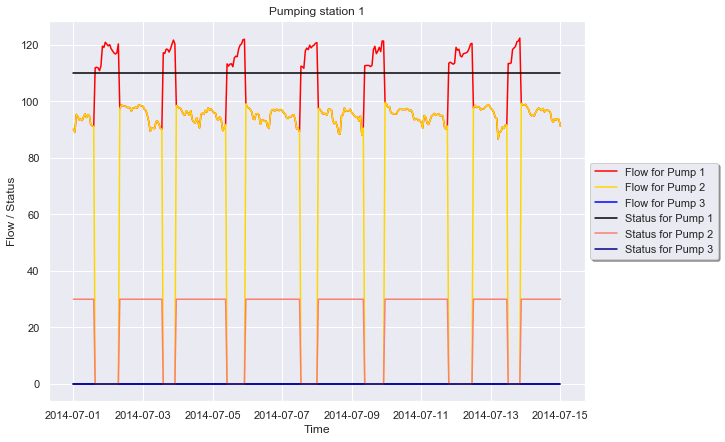

In [6]:
df_slice = df_train.loc['2014-07-01 00:00:00':'2014-07-15 00:00:00']
create_pump_station_plot(df_slice, "pump_station1.png", logger)

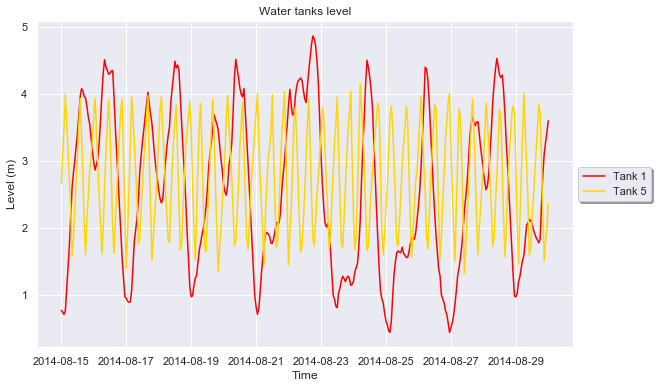

In [7]:
df_slice = df_train.loc['2014-08-15 00:00:00':'2014-08-30 00:00:00']
create_water_tanks_plot(df_slice, ["L_T1", "L_T5"], "water_tanks_1-5.png", logger)

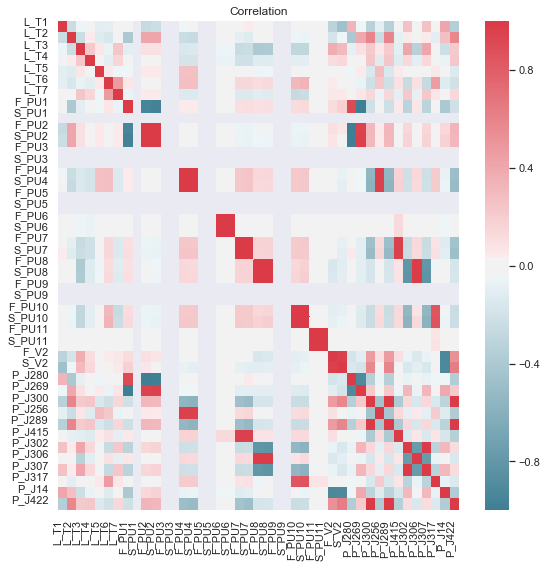

In [8]:
corr_df = df_train.drop('ATT_FLAG', axis = 1).corr(method = 'pearson')
create_correlation_heatmap("Correlation", corr_df, df_train.columns[:-1], "corr_train.png", logger)

In [9]:
mavg_model = MovingAverage(window_size = 3, logger = logger)
mavg_model.load_signal(times = df_train.index.values, values = df_train['L_T7'].values, 
                       signal_str = "water tank 7")
mavg_model.predict()

[2019.06.04-22:11:55] Init moving average with window size 3
[2019.06.04-22:11:55] Sample#0- Pred: 1.886829972 / True: 3.203572989
[2019.06.04-22:11:55] Sample#1000- Pred: 2.7811246713333335 / True: 2.845271349
[2019.06.04-22:11:55] Sample#2000- Pred: 3.3444891770000003 / True: 2.636483192
[2019.06.04-22:11:55] Sample#3000- Pred: 2.691331029 / True: 4.411103249
[2019.06.04-22:11:55] Sample#4000- Pred: 3.425117651333333 / True: 4.8062300680000005
[2019.06.04-22:11:55] Sample#5000- Pred: 2.419231494 / True: 2.455788612
[2019.06.04-22:11:55] Sample#6000- Pred: 3.6817426680000005 / True: 3.92780757
[2019.06.04-22:11:55] Sample#7000- Pred: 3.1073628266666664 / True: 3.8054625989999997
[2019.06.04-22:11:55] Sample#8000- Pred: 2.2490506173333333 / True: 2.342008114
[2019.06.04-22:11:55] MSE: 0.7809850906191695


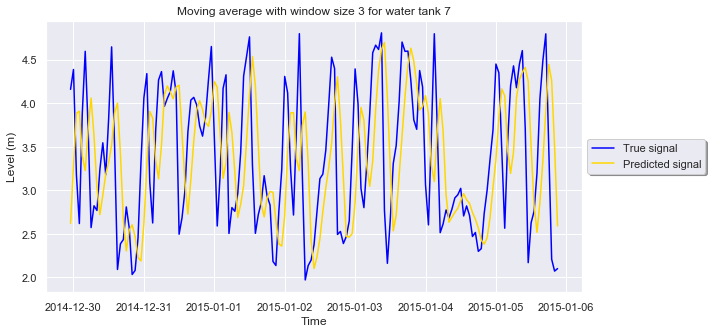

In [10]:
mavg_model.plot_prediction(start_time = '2014-12-29 22', stop_time = '2015-01-05 22', 
                           filename = "mavg_tank7.png")

In [11]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%y %H')
optim_filename = logger.config_dict['OPTIM_FILE']
logger.log("Start reading optimization file {}...".format(optim_filename))
df_optim = pd.read_csv(logger.get_data_file(optim_filename), skipinitialspace = True,
                       parse_dates = ['DATETIME'], date_parser = dateparse, index_col = 'DATETIME')
df_optim.sort_index(inplace = True)
logger.log("Finish reading optimization file", show_time = True)

[2019.06.04-22:11:56] Start reading optimization file BATADAL_dataset04.csv...
[2019.06.04-22:11:56] Finish reading optimization file [0.09s]


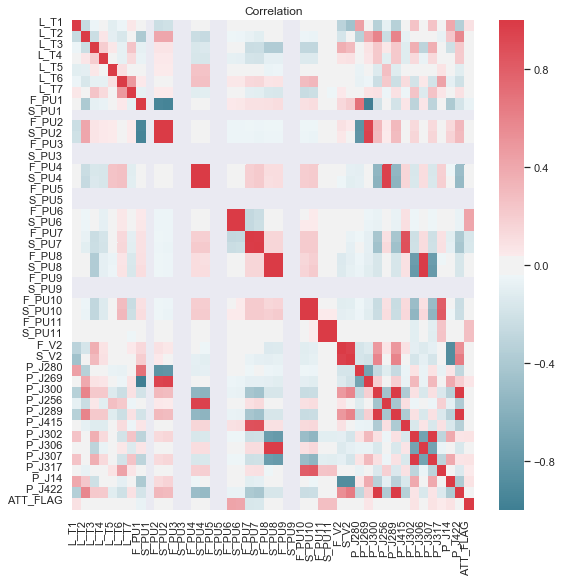

In [12]:
corr_df = df_optim.corr(method = 'pearson')
create_correlation_heatmap("Correlation", corr_df, df_train.columns, "corr_optim.png", logger)


In [13]:
optim_attacks_filename = logger.config_dict['OPTIM_ATTACKS_FILE']
df_attacks = pd.read_csv(logger.get_data_file(optim_attacks_filename))
attack1 = df_attacks.iloc[0]
df_slice = df_optim.loc[attack1['Start_time']:attack1['End_time']]
logger.log("Start analyzing attack 1 from {} to {}".format(attack1['Start_time'], attack1['End_time']))

[2019.06.04-22:11:58] Start analyzing attack 1 from 13/09/2016 23 to 16/09/2016 00


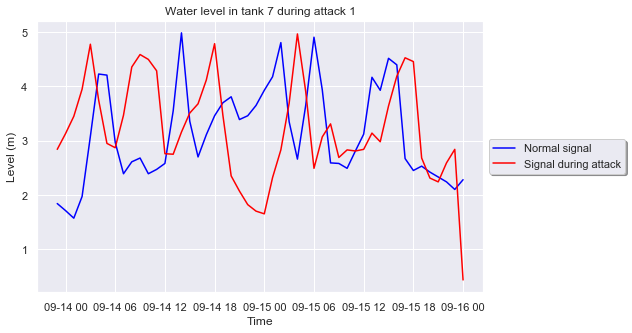

In [14]:
visualize_attack(df_slice.index, normal_values = df_optim.loc['2016-07-13 23':'2016-07-16 00']['L_T7'],
                attack_values = df_slice['L_T7'], title = "Water level in tank 7 during attack 1",
                axis_label = "Level (m)", filename = "attack1_t7.png", logger = logger)

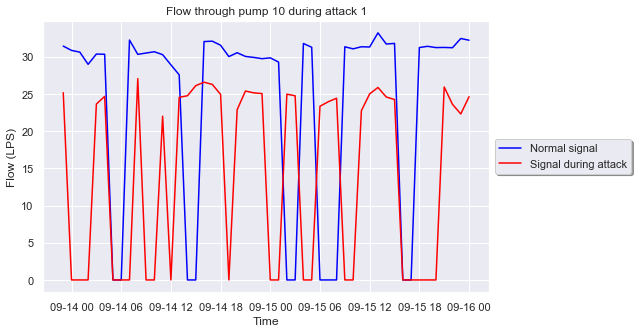

In [15]:
visualize_attack(df_slice.index, normal_values = df_optim.loc['2016-07-13 23':'2016-07-16 00']['F_PU10'],
                attack_values = df_slice['F_PU10'], title = "Flow through pump 10 during attack 1",
                axis_label = "Flow (LPS)", filename = "attack1_p10.png", logger = logger)

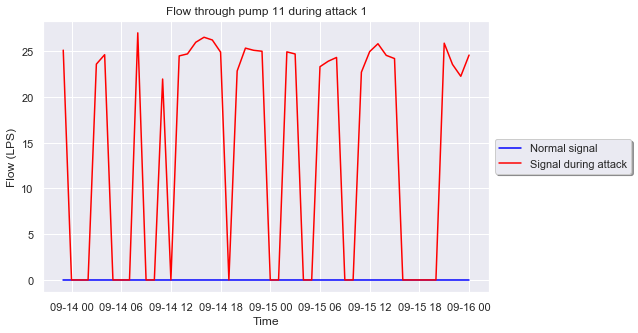

In [16]:
visualize_attack(df_slice.index, normal_values = df_optim.loc['2016-07-13 23':'2016-07-16 00']['F_PU11'],
                attack_values = df_slice['F_PU11'], title = "Flow through pump 11 during attack 1",
                axis_label = "Flow (LPS)", filename = "attack1_p11.png", logger = logger)

In [17]:
##################################### NOT FOR FAMILIARIZATION, JUST VISUALIZATION PURPOSES FOR N_GRAMS

[2019.06.04-22:12:00] Percentile discretization using 6 quantiles


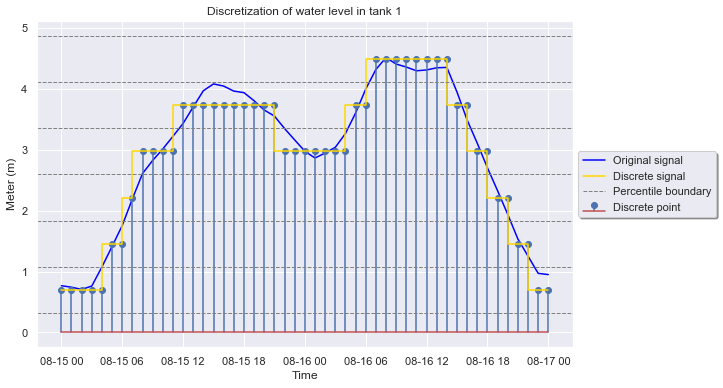

In [18]:
from discretization import PercentilesDiscretization

signal = df_train.L_T1

discretizator = PercentilesDiscretization(quantiles = 6, logger = logger)
discretizator.discretize_signal(signal)
discretizator.visualize_discretization(start_time = "2014-08-15 00:00:00", end_time = "2014-08-17 00:00:00",
                                       title = "Discretization of water level in tank 1", axis_label = "Meter (m)", 
                                       filename = "discrete_sig_t1.png")